In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = sns.load_dataset('iris')

In [3]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
ds.shape

(150, 5)

In [5]:
ds['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

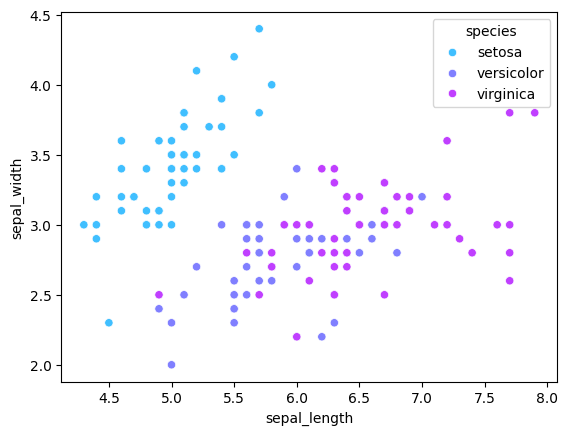

In [6]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=ds, hue='species', palette='cool')

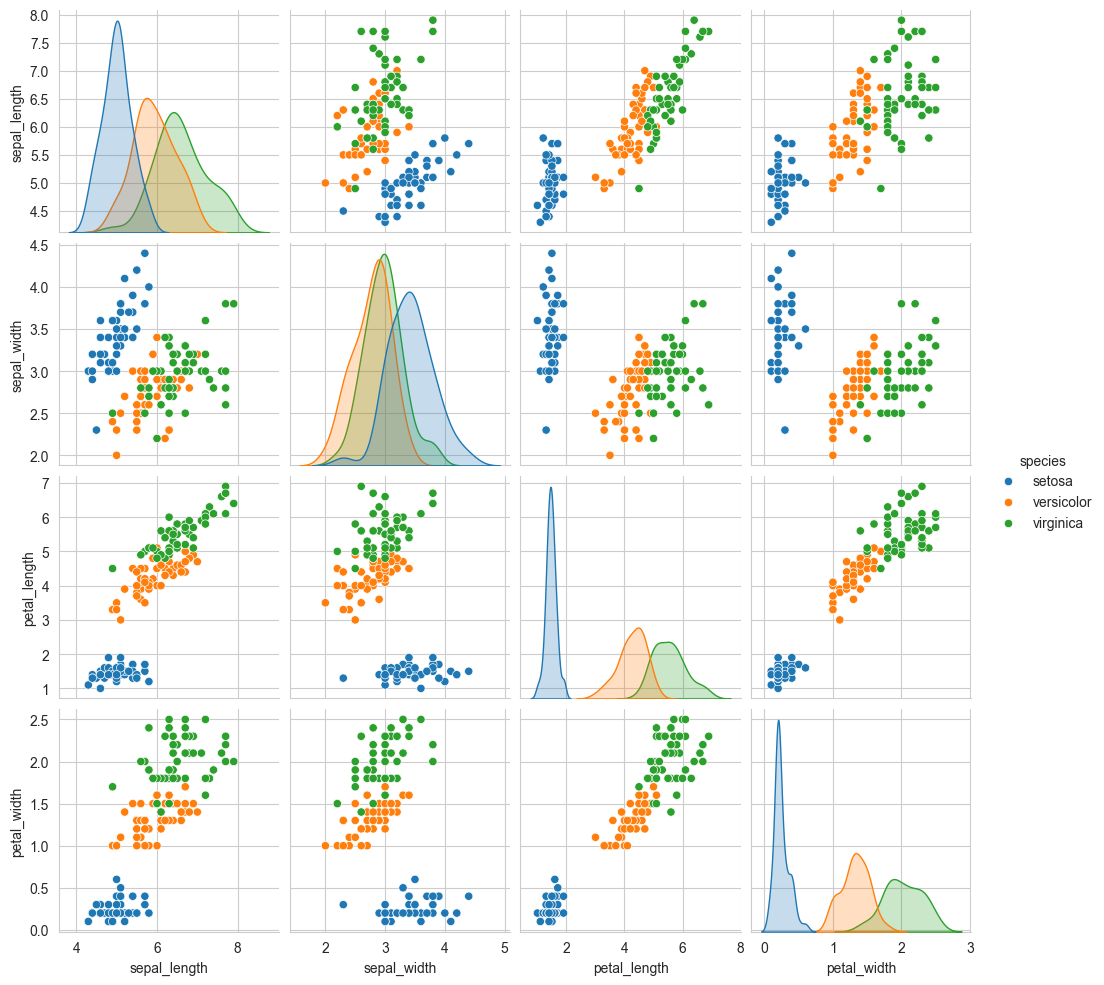

In [7]:
sns.set_style('whitegrid')
sns.pairplot(ds, hue='species')

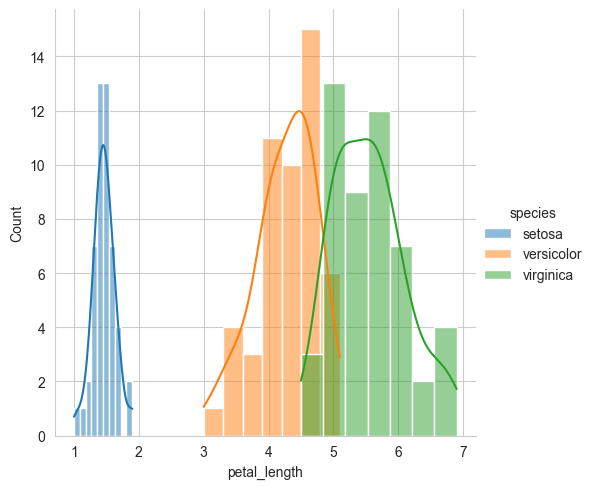

In [8]:
fg = sns.FacetGrid(ds, hue='species', height=5)
fg.map(sns.histplot, 'petal_length', kde=True).add_legend();

In [9]:
counts, bin_edges = np.histogram(ds['petal_length'], bins=10)
pdf = counts/(sum(counts))
pdf

array([0.24666667, 0.08666667, 0.        , 0.02      , 0.05333333,
       0.17333333, 0.19333333, 0.12      , 0.07333333, 0.03333333])

In [10]:
np.std(ds['petal_length'])

1.759404065775303

In [11]:
print(np.percentile(ds['petal_length'], np.arange(0,100,25)))

[1.   1.6  4.35 5.1 ]


In [12]:
print(np.median(np.append(ds['petal_length'], 50)))

4.4


In [13]:
from statsmodels import robust

robust.mad(ds['petal_length'])

1.8532527731320025

<Axes: xlabel='species', ylabel='petal_length'>

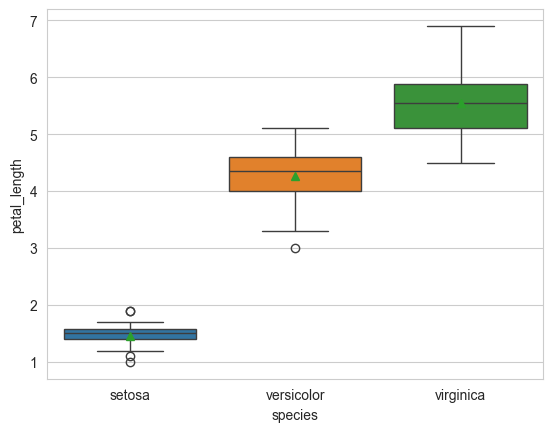

In [14]:
sns.boxplot(x='species', y='petal_length', data=ds, hue='species', showmeans=True)

<Axes: xlabel='species', ylabel='petal_length'>

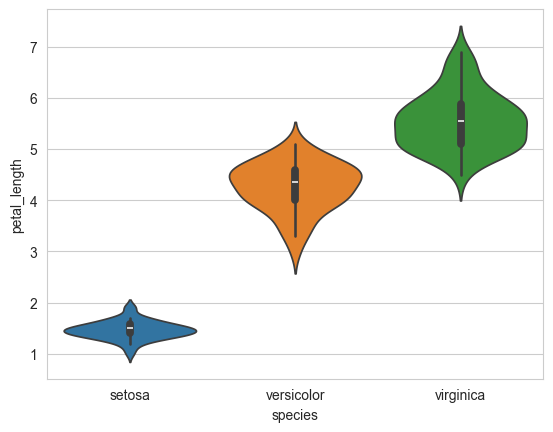

In [15]:
sns.violinplot(x='species', y='petal_length', data=ds, hue='species')

In [16]:
df = pd.read_csv('haberman.csv')

In [17]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [18]:
df.columns = ['age', 'operation_year', 'axillary_lymph_node', 'survival_status']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  305 non-null    int64
 1   operation_year       305 non-null    int64
 2   axillary_lymph_node  305 non-null    int64
 3   survival_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [20]:
df['survival_status'] = df['survival_status'].map({1:'Yes', 2:'No'})

In [21]:
df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [22]:
df.describe()

,age,operation_year,axillary_lymph_node
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [23]:
df['survival_status'].value_counts()

survival_status
Yes    224
No      81
Name: count, dtype: int64

In [24]:
status_yes = df[df['survival_status']=='Yes']
status_yes.describe()

,age,operation_year,axillary_lymph_node
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [25]:
status_no = df[df['survival_status']=='No']
status_no.describe()

,age,operation_year,axillary_lymph_node
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


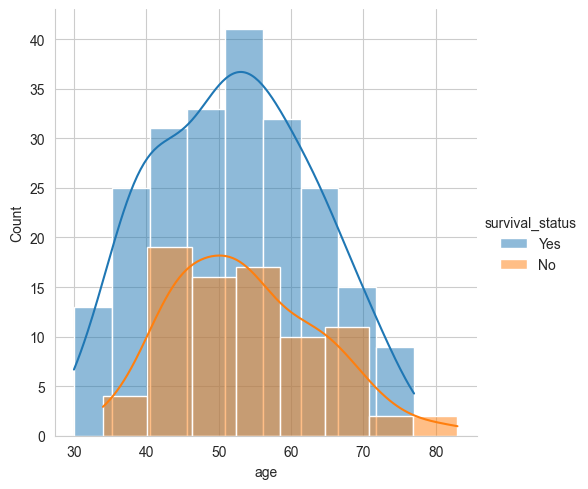

In [26]:
sns.FacetGrid(df, hue='survival_status', height=5) \
    .map(sns.histplot, 'age', kde=True) \
    .add_legend()


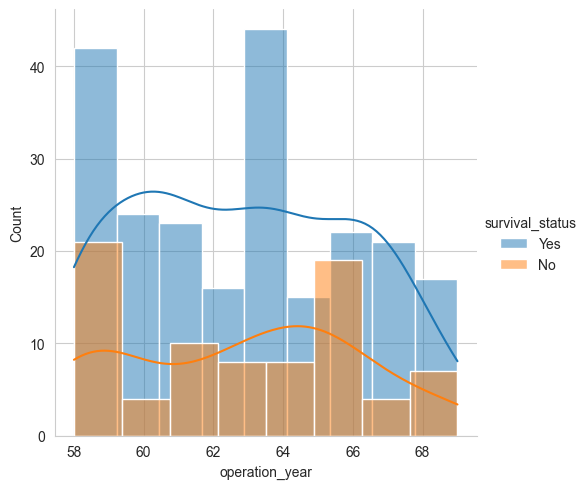

In [27]:
sns.FacetGrid(df, hue='survival_status', height=5) \
    .map(sns.histplot, 'operation_year', kde=True) \
    .add_legend()

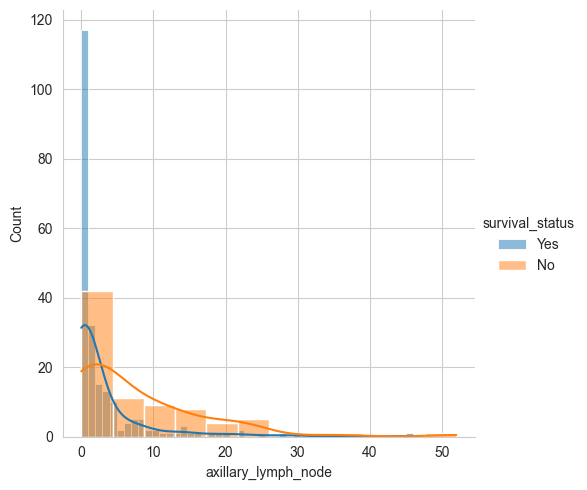

In [28]:
sns.FacetGrid(df, hue='survival_status', height=5) \
    .map(sns.histplot, 'axillary_lymph_node', kde=True) \
    .add_legend()

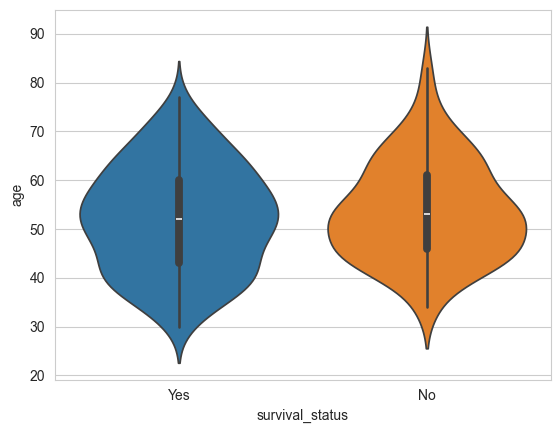

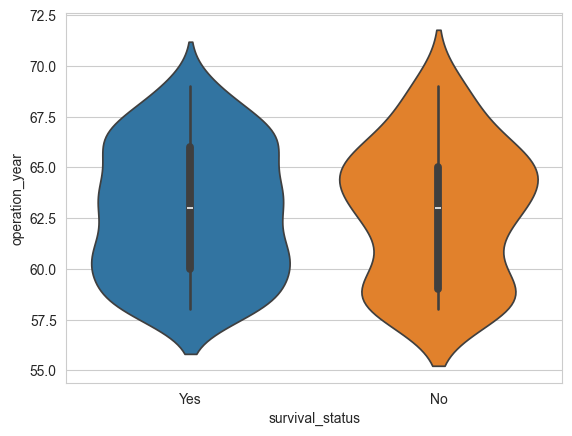

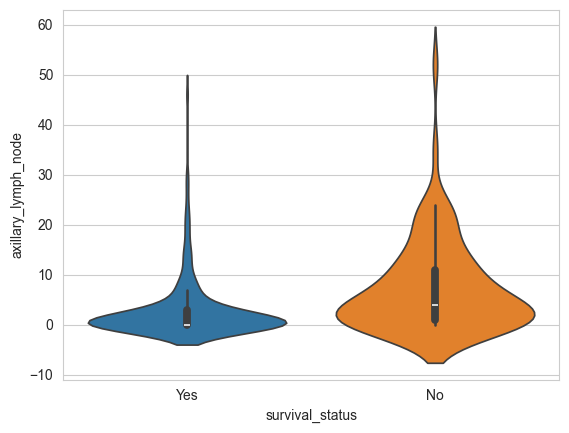

In [29]:
sns.violinplot(x='survival_status', y='age', data=df, hue='survival_status')
plt.show()
sns.violinplot(x='survival_status', y='operation_year', data=df, hue='survival_status')
plt.show()
sns.violinplot(x='survival_status', y='axillary_lymph_node', data=df, hue='survival_status')
plt.show()

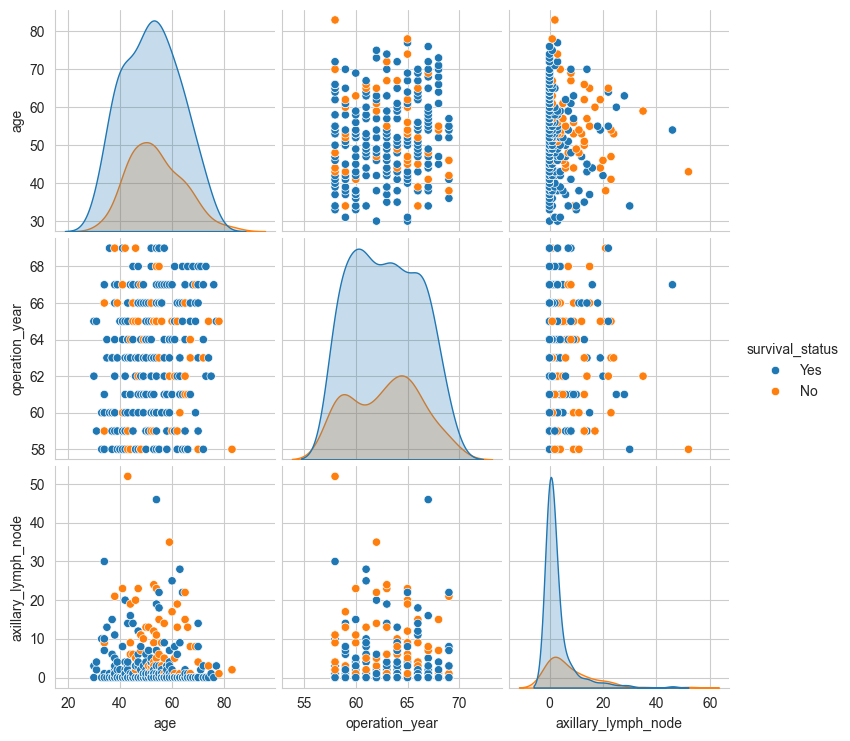

In [30]:
sns.pairplot(df, hue='survival_status')

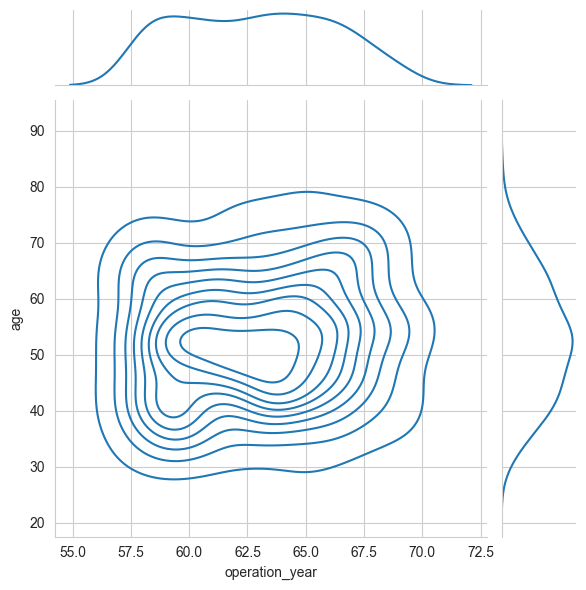

In [31]:
sns.jointplot(x='operation_year', y='age', data=df, kind='kde', palette='icefire')
plt.show()

EDA (Exploratory Data Analysis)

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
ds = sns.load_dataset('tips')

In [35]:
ds.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
ds.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [37]:
ds.shape

(244, 7)

In [39]:
ds.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [40]:
ds.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [41]:
ds.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [44]:
ds['sex'].nunique()

2

In [47]:
ds.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [59]:
rest = ds.drop(['smoker', 'size', 'sex', 'day', 'time'], axis=1)

In [60]:
rest.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


<Axes: >

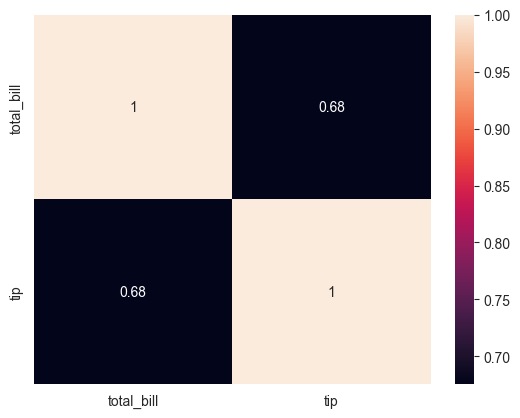

In [64]:
corelation = rest.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

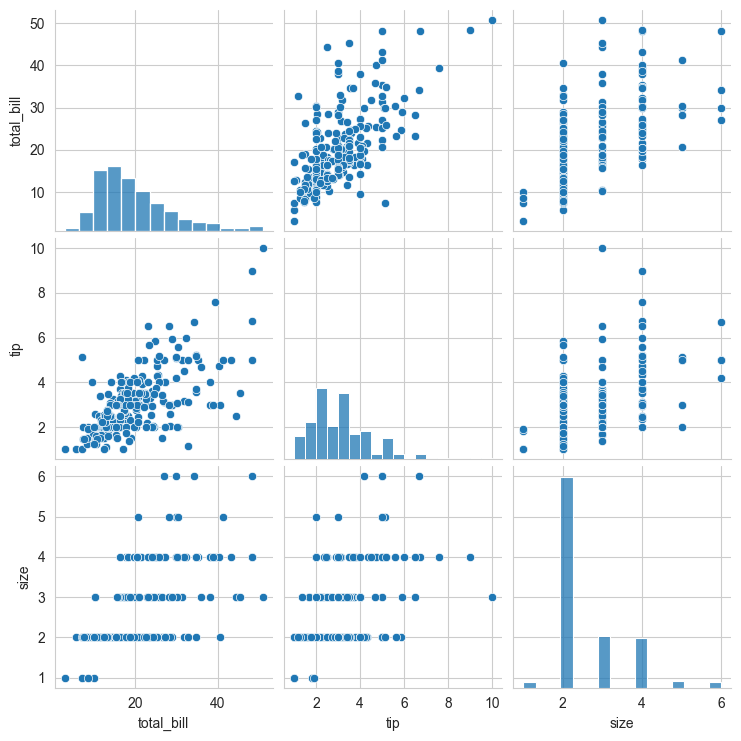

In [62]:
sns.pairplot(ds)

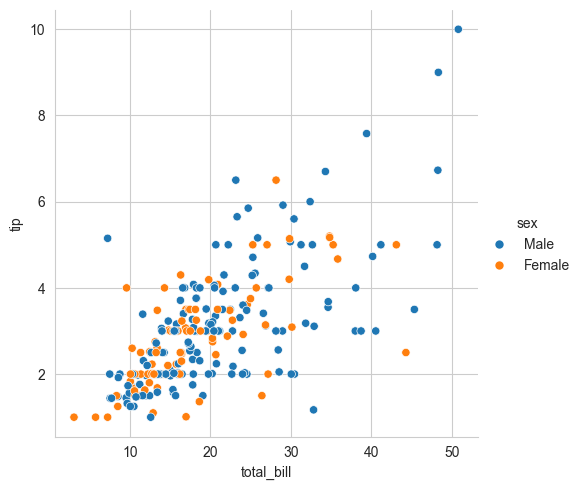

In [70]:
sns.relplot(x='total_bill', y='tip', hue='sex', data=ds)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_11652\1898893994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

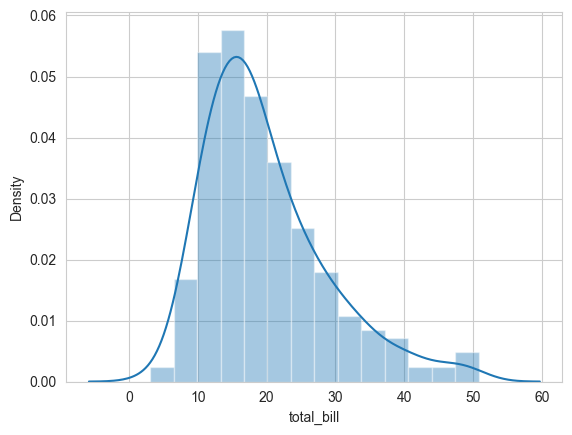

In [71]:
sns.distplot(ds['total_bill'])

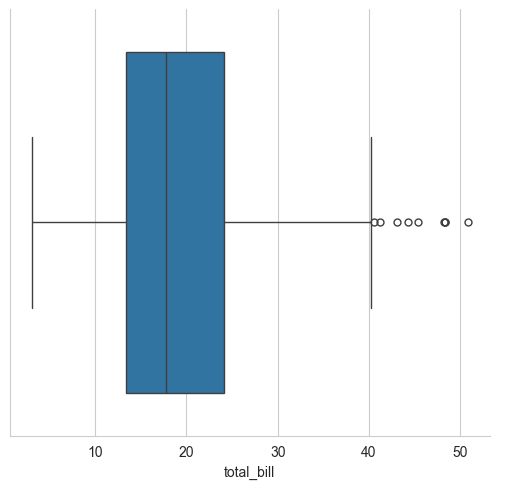

In [73]:
sns.catplot(x='total_bill', data=ds, kind='box')

In [74]:
ds = sns.load_dataset('penguins')

In [75]:
ds.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [76]:
ds.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [78]:
ds.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


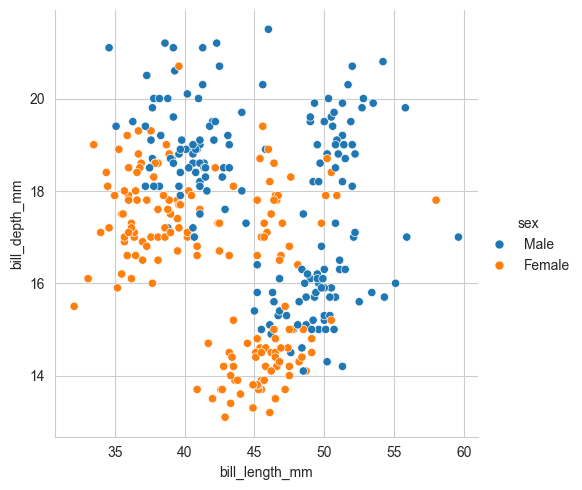

In [81]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', hue='sex', data=ds)

In [82]:
ds.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'